In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('/content/Supermart Grocery Sales.csv')
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
data.shape

(9994, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
data.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [ ]:
# Check for missing values
data.isnull().sum()

,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [ ]:
# Check for duplicates
data.drop_duplicates(inplace=True)

In [ ]:
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='mixed')

In [ ]:
# Extract day, month, and year from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

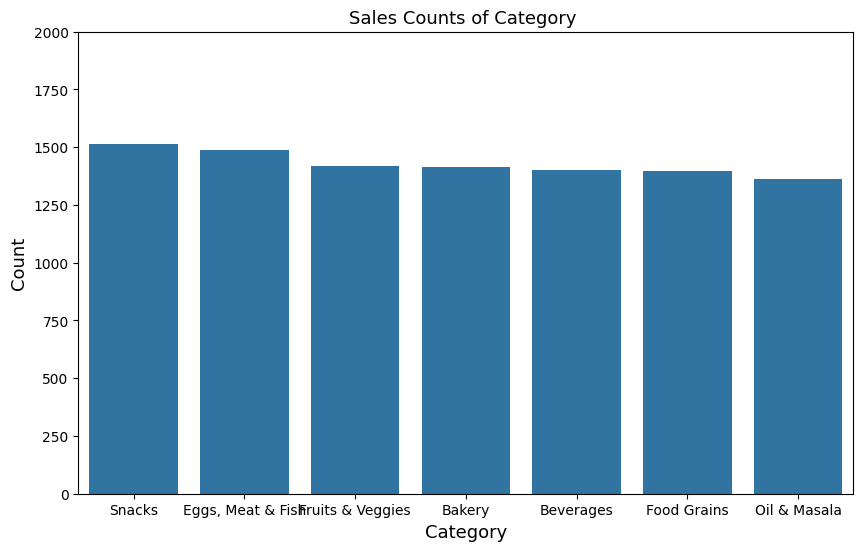

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index)
plt.ylim(0,2000)
plt.title('Sales Counts of Category ', fontsize = 13)
plt.xlabel('Category', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.show()

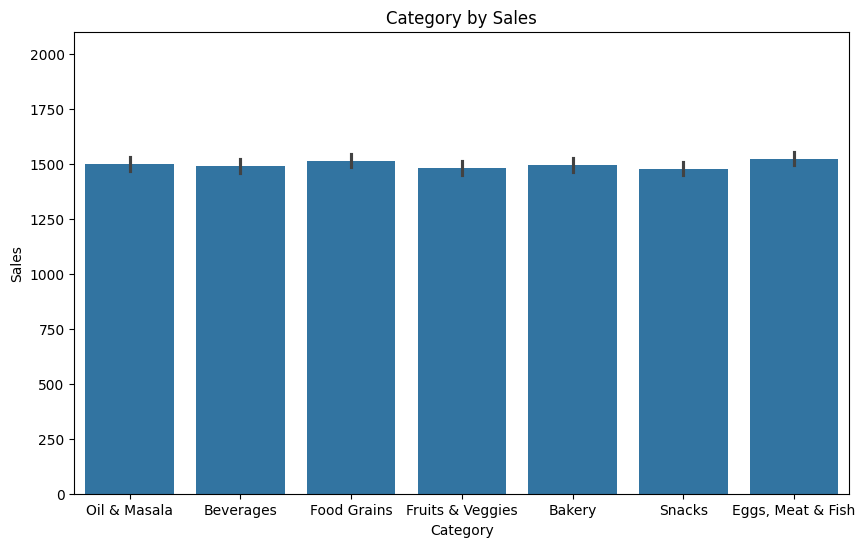

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Category', y = 'Sales', data = data)
plt.ylim(0, 2100)
plt.title('Category by Sales')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

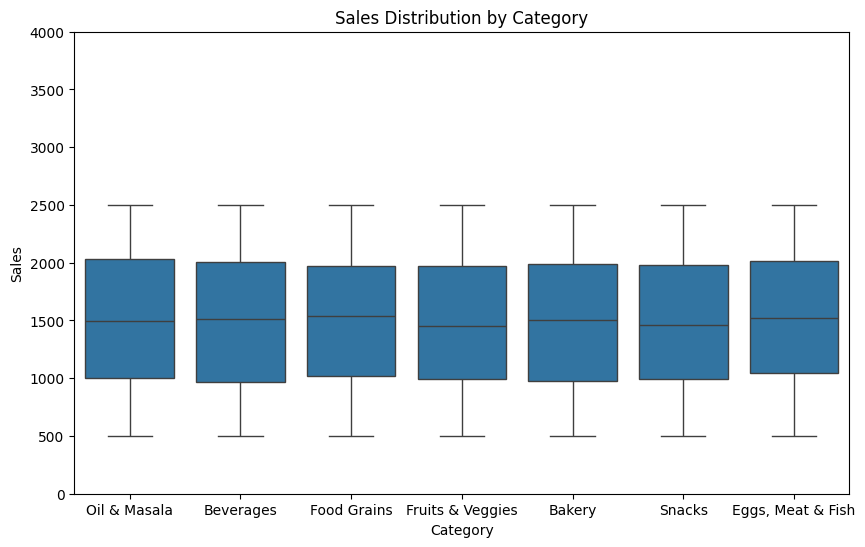

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data)
plt.ylim(0, 4000)
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

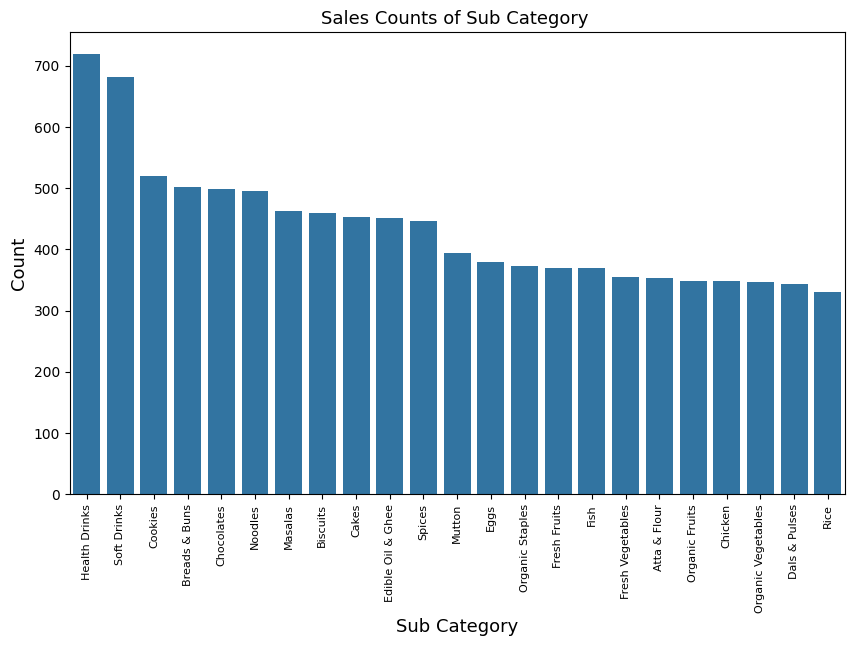

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sub Category', order=data['Sub Category'].value_counts().index)
plt.title('Sales Counts of Sub Category ', fontsize = 13)
plt.xlabel('Sub Category', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.xticks(rotation =90, fontsize =8)
plt.show()

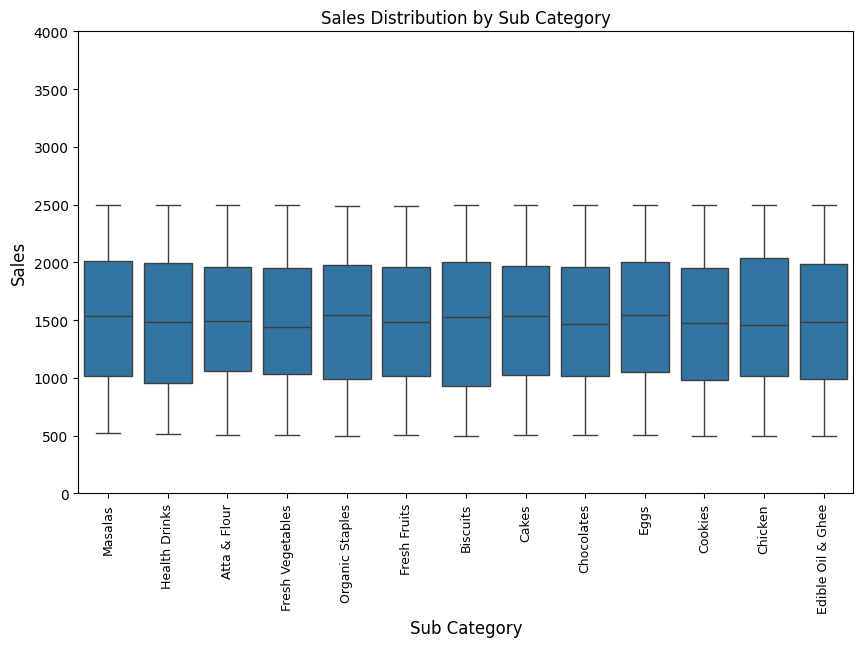

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sub Category', y='Sales', data=data)
plt.ylim(0, 4000)
plt.xlim(-0.5, 12.5)
plt.title('Sales Distribution by Sub Category')
plt.xlabel('Sub Category', fontsize =12)
plt.ylabel('Sales', fontsize =12)
plt.xticks(rotation =90, fontsize =9)
plt.show()

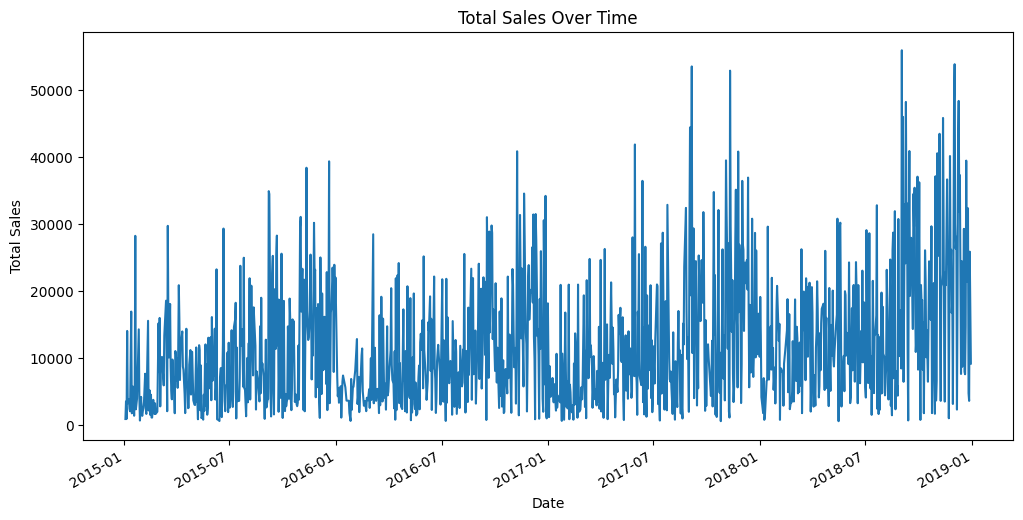

In [ ]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
# Initialize the label encoder
le = LabelEncoder()

In [ ]:
# Encode categorical variables
data['Order ID'] = le.fit_transform(data['Order ID'])
data['Customer Name'] = le.fit_transform(data['Customer Name'])
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])

In [ ]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,0,12,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8,11,2017
1,1111,37,1,13,8,2017-11-08,3,749,0.18,149.80,0,8,11,2017
2,2222,14,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12,6,2017
3,3333,15,4,12,4,2016-10-11,3,896,0.25,89.60,0,11,10,2016
4,4444,28,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11,10,2016


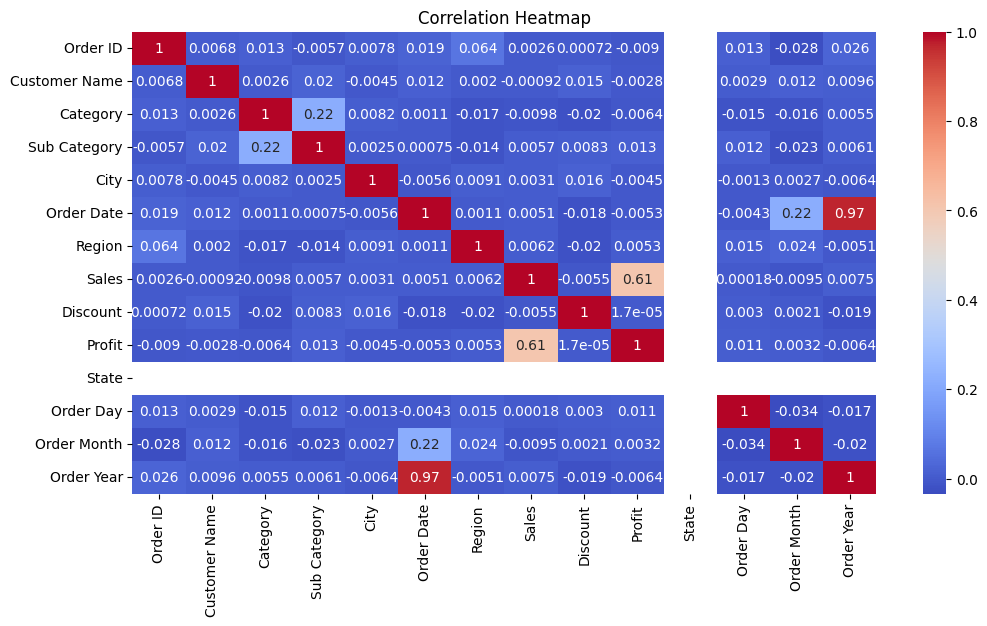

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Select features
features = data.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales', 'Order Month'])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
data['Sales'], test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 213030.68736916437
R-squared: 0.35409350805366546


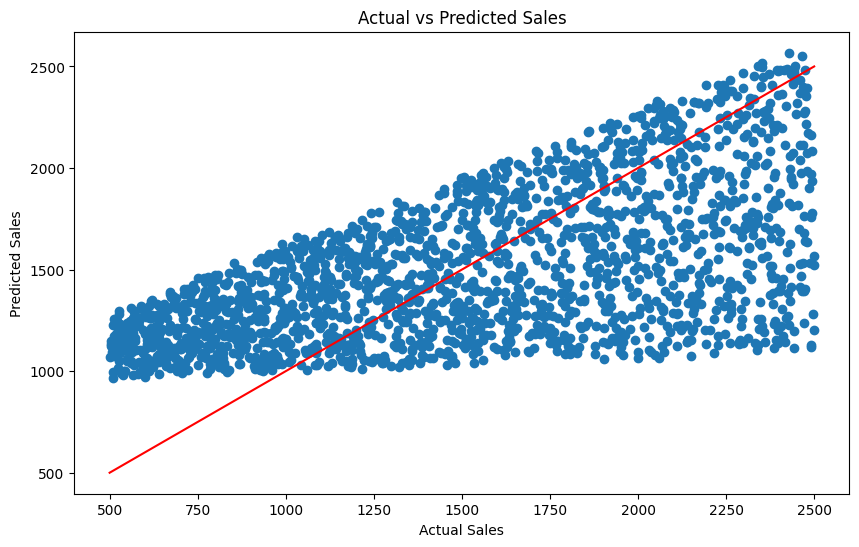

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()